In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
digits = datasets.load_digits()

In [23]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [12]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [14]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
digits.data.shape

(1797, 64)

In [16]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [17]:
digits.images.shape

(1797, 8, 8)

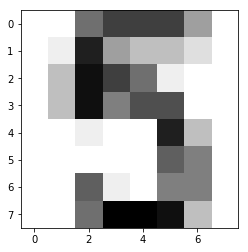

In [22]:
plt.imshow(digits.images[1010],cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [24]:
digits.target.shape

(1797,)

In [27]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [31]:
X = digits.data
y = digits.target

In [34]:
print('X shape : {} \ny shape : {}'.format(X.shape,y.shape))

X shape : (1797, 64) 
y shape : (1797,)


In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [36]:
print('X_train shape : {}\nX_test shape : {}\ny_train shape : {}\ny_test shape : {}'.format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train shape : (1437, 64)
X_test shape : (360, 64)
y_train shape : (1437,)
y_test shape : (360,)


In [37]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [38]:
knn.score(X_test,y_test)

0.9833333333333333

In [47]:
import numpy as np
neighbor = np.arange(1,12)
train_accuracy = np.empty(len(neighbor))
test_accuracy = np.empty(len(neighbor))

In [48]:
for i,k in enumerate(neighbor):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)

In [49]:
train_accuracy

array([1.        , 0.99164927, 0.99373695, 0.99373695, 0.99164927,
       0.98956159, 0.99025748, 0.98956159, 0.9874739 , 0.98608212,
       0.98608212])

In [50]:
test_accuracy

array([0.98611111, 0.98611111, 0.98611111, 0.98333333, 0.98333333,
       0.98055556, 0.98333333, 0.97777778, 0.98055556, 0.97777778,
       0.97777778])

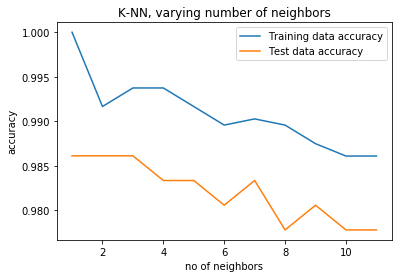

In [51]:
plt.title('K-NN, varying number of neighbors')
plt.plot(neighbor,train_accuracy,label='Training data accuracy')
plt.plot(neighbor,test_accuracy,label='Test data accuracy')
plt.legend()
plt.xlabel('no of neighbors')
plt.ylabel('accuracy')
plt.show()